In [38]:
from os import environ as env
import qiskit.tools.jupyter

%qiskit_version_table
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [39]:
## qiskit-ibmq-provider alternative
from qiskit import *

from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account(env["TOKEN"], overwrite=True)
provider = IBMProvider()

provider = IBMProvider(instance=env["INSTANCE"])

In [40]:
provider.backends()

[<IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibm_sherbrooke')>]

In [41]:
from qiskit_ibm_provider import least_busy

backend = least_busy(provider.backends())
backend

<IBMBackend('ibm_geneva')>

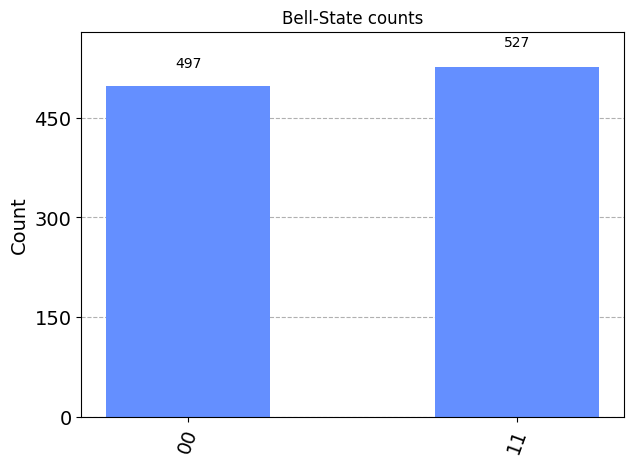

In [44]:
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

sim_backend = AerSimulator()

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Run and get counts
result = sim_backend.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')